<a href="https://colab.research.google.com/github/javiervasquezufm/ELEMENTS-OF-MACHINE-LEARNING/blob/master/LDA%2CQDA%2CKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemas conceptuales



1.   Lee la sección 4.4.2 del libro Elements of Machine Learning. Trata sobre el uso de análisis de varianza en una base de datos de una enfermedad del corazón. Describe en qué consiste este análisis.

Lo que se quiere hacer en el analisis es saber el efecto que tienen todos los predictores para los casos de problemas en el corazon dentro de una region que se ve muy afectada. Por lo que se toman como los predictores tabaco, ldl, el historico familiar y la edad. Dentro de las cuales la genetica familiar es el factor que mas influye para este tipo de problemas.

2.   Haz un resumen de la sección 4.5 del libro Introduction to Statistical Learning. Puedes describir las ventajas y desventajas de cada método de clasificación en un cuadro diagrama o en prosa. Además, describe los seis escenarios mostrados en la lectura y sintetiza cuáles fueron las razones por las que cada método fue mejor o peor que otros.


3.   Problema 7 del capítulo 4 de Introduction to Statistical Learning  
p1(4)=0.752 

# Problema aplicado

Utiliza la base de datos Auto en http://www-bcf.usc.edu/~gareth/ISL/data.html para predecir si un carro tiene alto o bajo consumo de gasolina.


1.   Crea una variable binaria mpg01 que contiene 1 si mpg tiene un valor mayor a la mediana y 0 si tiene un valor menor a la mediana. Haz un nuevo dataset con esta columna y otras variables importantes del dataset original de auto.
2.   Usa representaciones gráficas como gráficas de dispersión y diagramas de cajas para investigar qué otras variables están asociadas a mpg01.
3.   Separa los datos en de entrenamiento y de prueba.
4.   Queremos predecir mpg01. Utiliza las variables que según tu análisis en b) estaban más asociadas como predictores. Harás más de cuatro modelos, uno con LDA, luego QDA, luego regresión logística y por último KNN (con diferentes valores de k).
5.   Calcula el error de prueba de cada modelo y compáralos. Qué método de clasificación es tu preferido? Argumenta tu respuesta como si fuera un escenario de la sección 4.5 del libro



In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors , KNeighborsClassifier

print("Todos los paquetes han sido importados:")
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Seaborn version: {}".format(sns.__version__))
print("Statsmodels-learn version: {}".format(statsmodels.__version__))

Todos los paquetes han sido importados:
Numpy version: 1.14.6
Pandas version: 0.22.0
Matplotlib version: 3.0.2
Seaborn version: 0.7.1
Statsmodels-learn version: 0.8.0


In [0]:
from google.colab import files
data = files.upload()

Saving Auto1.csv to Auto1.csv


In [0]:
auto = pd.read_csv("Auto1.csv")

In [0]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [0]:
auto

In [0]:
auto.fillna(0, inplace=True)
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.992443,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.527472,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [0]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null int64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 28.0+ KB


In [0]:
auto['mpg'].median()


23.0

In [0]:
mayor = auto.mpg >= 23
menor = auto.mpg < 23
column_name = 'mpg01'
auto.loc[mayor, column_name] = '1'
auto.loc[menor, column_name] = '0'

In [0]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


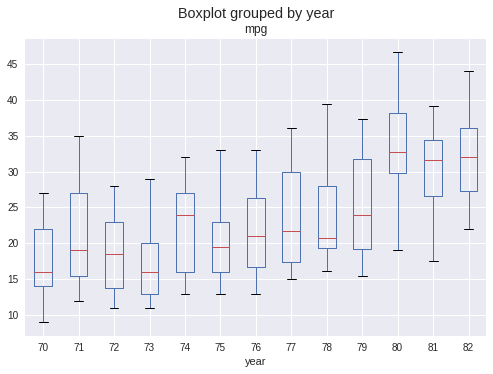

In [0]:
auto.boxplot(column="mpg", by="year")

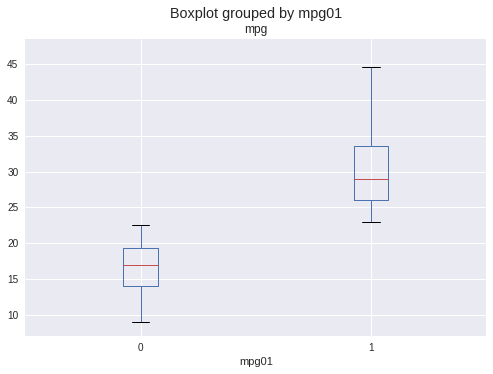

In [0]:
auto.boxplot(column="mpg", by="mpg01")

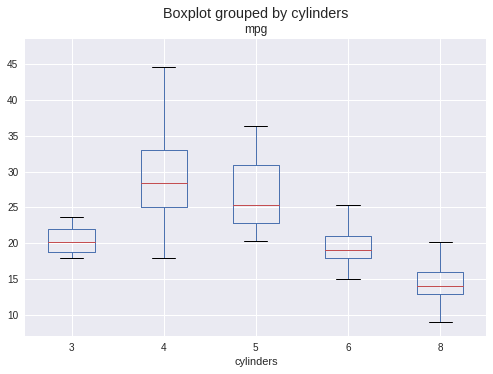

In [0]:
auto.boxplot(column="mpg", by="cylinders")

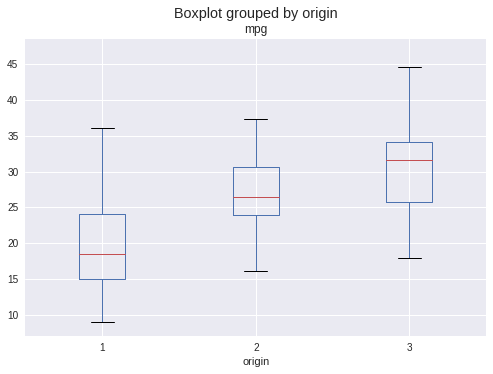

In [0]:
auto.boxplot(column="mpg", by="origin")

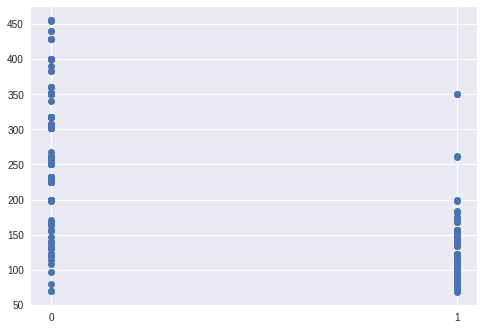

In [0]:
x1 = auto['mpg01']
x2 = auto['displacement']
plt.plot(x1, x2,"o")

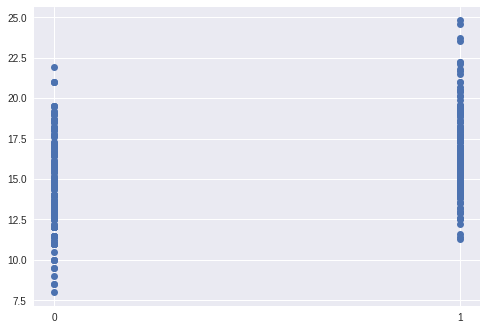

In [0]:
x1 = auto['mpg01']
x2 = auto['acceleration']
plt.plot(x1, x2,"o")

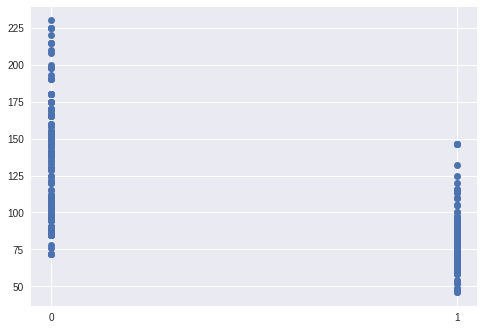

In [0]:
x1 = auto['mpg01']
x2 = auto['horsepower']
plt.plot(x1, x2,"o")

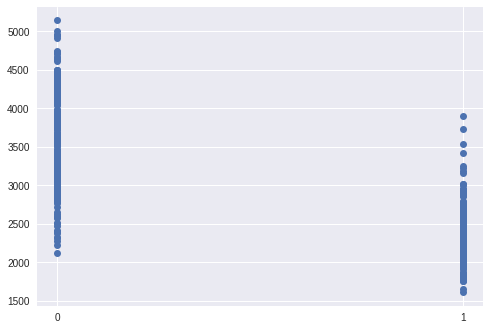

In [0]:
x1 = auto['mpg01']
x2 = auto['weight']
plt.plot(x1, x2,"o")

In [0]:
train, test = train_test_split(auto, test_size = 0.2)
lda = LinearDiscriminantAnalysis()
x_train = train[['cylinders', 'weight', 'displacement', 'horsepower']].values.reshape(-1,4)
x_test = test[['cylinders', 'weight', 'displacement', 'horsepower']].values.reshape(-1,4)
y_train = train['mpg01'].values.reshape(-1,1)



In [0]:
lda.fit(x_train, y_train)

In [0]:
predicts = lda.predict(x_test)
actual = test['mpg01']
confusion_matrix(predicts, actual)

array([[33,  2],
       [ 5, 40]])

In [0]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

In [0]:
predicts2 = qda.predict(x_test)
actual2 = test['mpg01']
confusion_matrix(predicts2, actual2)

array([[33,  4],
       [ 5, 38]])

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
predicts3 = knn.predict(x_test)
actual3 = test['mpg01']

In [0]:
confusion_matrix(predicts3, actual3)

array([[35,  5],
       [ 3, 37]])

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
predicts4 = knn.predict(x_test)
actual4 = test['mpg01']
confusion_matrix(predicts4, actual4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([[35,  3],
       [ 3, 39]])

In [0]:
ldasum=(32+33)/(32+33+2+7)
qdasum=(40+32)/(40+32+3+5)
knnsum=(49+29)/(39+6+6+29)
print("Error de prueba de LDA: ",ldasum,"")
print("Error de prueba de LDA: ",qdasum,"")
print("Error de prueba de LDA: ",knnsum,"")

Error de prueba de LDA:  0.8783783783783784 
Error de prueba de LDA:  0.9 
Error de prueba de LDA:  0.975 
